# Algo-3(Multiple Linear Regression)

# Step - 1 : Business Problem Understanding
- **Previously, we explored Is there a relationship between total advertising spend and sales? as well as predicting the total sales for some value of total spend**
- **What is the relationship between each advertising channel (TV,Radio,Newspaper) and sales?**

# Step - 2 : Data Understanding
**Load Data & Understand every variable**

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [124]:
df = pd.read_csv("Advertising.csv")
df.head()

,TV,radio,newspaper,sales
0,230100,37800,69200,22100
1,44500,39300,45100,10400
2,17200,45900,69300,9300
3,151500,41300,58500,18500
4,180800,10800,58400,12900


- **Data Set Understnading**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   TV         200 non-null    int64
 1   radio      200 non-null    int64
 2   newspaper  200 non-null    int64
 3   sales      200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


In [7]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [69]:
continuous = ['TV', 'radio', 'newspaper', 'sales']

- **Exploratory Data Analysis**

In [71]:
df[continuous].describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147042.500000,23264.000000,30554.000000,14022.500000
std,85854.236315,14846.809176,21778.620839,5217.456566
min,700.000000,0.000000,300.000000,1600.000000
25%,74375.000000,9975.000000,12750.000000,10375.000000
50%,149750.000000,22900.000000,25750.000000,12900.000000
75%,218825.000000,36525.000000,45100.000000,17400.000000
max,296400.000000,49600.000000,114000.000000,27000.000000


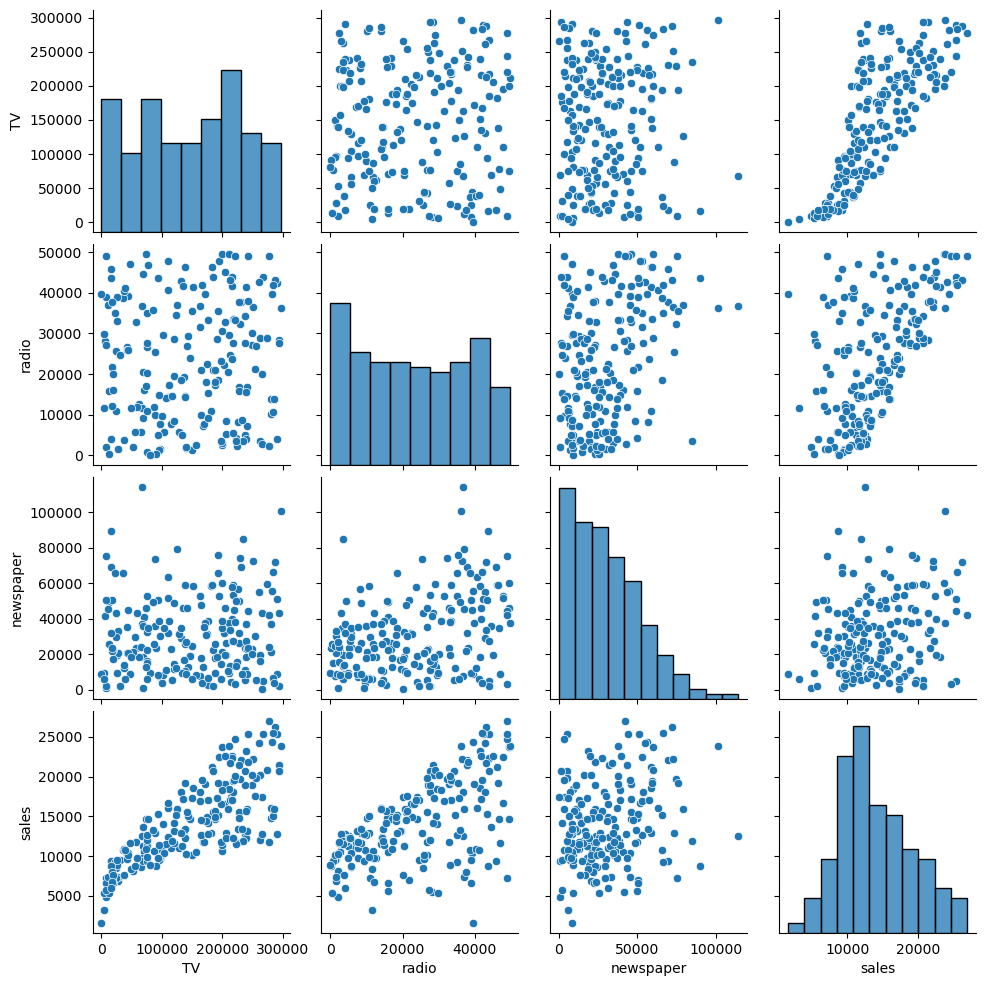

In [73]:
sns.pairplot(df)
plt.show()

In [75]:
df[continuous].corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


- The relation between ouput varaible and input variable should be high.
- The higher the value the stronger the correlation, better accuracy
- if any input variable has correlation less than 0.2 with output variable, then that input variable should be dropped
- The relation between any two independent variables should be low
- **If the correlation between any 2 independent variables is >=0.5, then it is called as colinearity problem**
- **Solution :** drop 1 out of 2

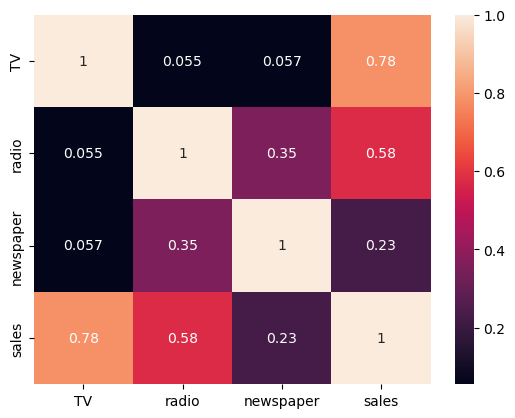

In [77]:
sns.heatmap(df[continuous].corr(), annot=True)
plt.show()

# Only for Multiple Regression : >1 input

- **input & input** : Low corelation (correct)

                  : High (colinearity problem)

                  : Multiple Pairs having colinerity problem (Multicolinearity Problem)

Solution for Colinearity Problem : drop 1 of them

Which column has to be drop : if any column repeats in multi-colinearity : drop that column



- **input & output** : high corelation (correct)

                   : Low corelation (problem) [What happens? : Accuracy will be less]

output & output : NA (why? : we dont have 2 output variables to check corelation)

In [79]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [81]:
df[['TV', 'radio', 'newspaper', 'sales']].skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

# Step-3: Data Preprocessing

- **Data Cleaning**

In [49]:
# For this Dataset no Data Cleaning required

- **Data Wrangling**

In [47]:
# For this dataset no encoding required

- **X&y**

In [84]:
X=df[["TV","radio","newspaper"]]

y=df ['sales']

- **to identify the best random state number**

In [142]:
Train = []
CV = []

for i in range(0,100):
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)

    from sklearn. linear_model import LinearRegression
    model = LinearRegression()
    model.fit(X_train,y_train)

    ypred_train = model.predict(X_train)

    from sklearn.metrics import r2_score
    Train.append(r2_score(y_train,ypred_train))

    from sklearn.model_selection import cross_val_score
    CV.append(cross_val_score(model,X_train, y_train, cv=5).mean())

em = pd.DataFrame({"Train":Train, "CV":CV})
gm = em[(abs(em['Train']-em['CV']) <= 0.05)]
rs = gm[gm["CV"] == gm["CV"].max()].index.tolist() [0]
print("best random state number :",rs)

best random state number : 96


- **Train-Test Split**

In [86]:
from sklearn. model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Modelling
- 3 i/p Columns

In [88]:
from sklearn. linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

print("Intercept:",model.intercept_)
print("Coefficients:",model.coef_)

Intercept: 3254.0971144188843
Coefficients: [ 0.0437726   0.19343299 -0.00222879]


# Evaluation

In [90]:
#Prediction on train data
ypred_train = model.predict(X_train)

#Evaluation on train data
from sklearn.metrics import r2_score
print("Train R2:",r2_score(y_train,ypred_train))

Train R2: 0.9209087553499528


In [92]:
#Cross Validation on train data
from sklearn.model_selection import cross_val_score
print("Cross Validation Score:", cross_val_score(model, X_train,y_train,cv=5).mean())

Cross Validation Score: 0.9157327701186169


In [94]:
#Predcition on test data
ypred_test = model.predict(X_test)

from sklearn.metrics import r2_score
print("Test R2:",r2_score(y_test,ypred_test))

Test R2: 0.8353672324670594


- **This is a Overfitting Problem**

- **Check for Assumptions**

**1) Linearity of Errors**

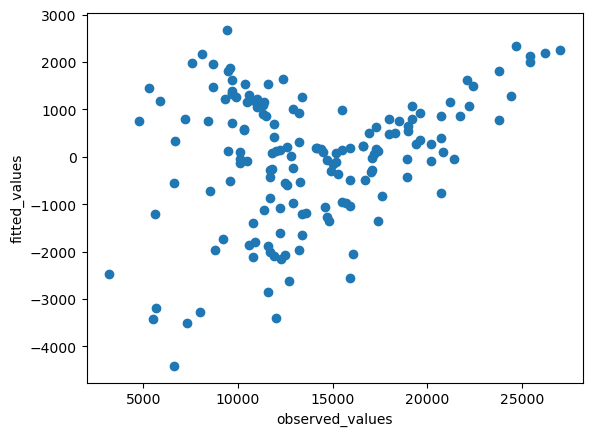

In [96]:
train_error = y_train - ypred_train

plt.scatter(y_train, train_error)
plt.xlabel("observed_values")
plt.ylabel("fitted_values")
plt.show()

**2) Normality of Errors**

In [100]:
train_error.skew()                      # It is normally distributed

-0.7040467730469485

**3. Equal Variance of Errors (Homoscadesicity)**

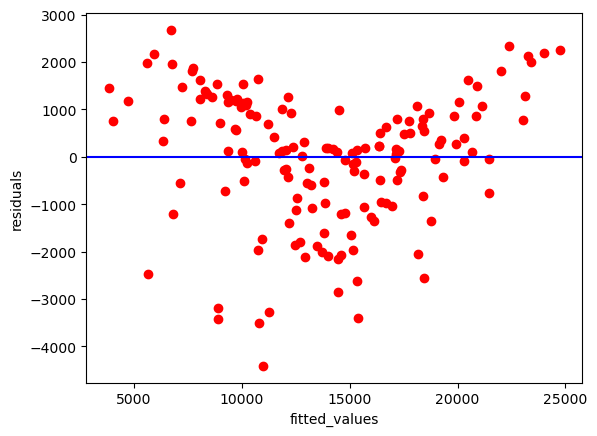

In [98]:
plt.scatter(ypred_train, train_error, c="r")
plt.axhline(y=0, color='blue')
plt.xlabel("fitted_values")
plt.ylabel("residuals")
plt.show()

- **This in unequal variance of error as on top side the values are less than 3000 where as on bottom the values are greater than -3000**
- **When ever you get Overfitting or Underfitting problem 100% your assumptions will fail**

**4. Independent of Errors (Variable Signifciance)**

**Hypothesis Testing for variables**

- **null hypothesis:** There is no relationship between input variable and output variable (and thus ß1 equals zero)
- **alternative hypothesis:** There is a relationship between input variable and output variable(and thus ß1 is not equal to zero)

In [102]:
import statsmodels. formula.api as smf
model1=smf.ols("y~X",data=df).fit()
model1. summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sat, 05 Oct 2024   Prob (F-statistic):           1.58e-96
Time:                        15:44:41   Log-Likelihood:                -1767.7
No. Observations:                 200   AIC:                             3543.
Df Residuals:                     196   BIC:                             3557.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2938.8894    311.908      9.422      0.000    2323.762    3554.016
X[0]           0.0458      0.001     32.809      0.000       0.043       0.049
X[1]           0.1885      0.009     21.893      0.000       0.172       0.206
X[2]          -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                     4.54e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.54e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- In above case, newspaper variable is not sognificiant (not important)
- Reason: p>0.05
- Meaning : regression is not fitted, instead of regression average model is best

**Added variable plot (AV plot)**

- partial differention insted of normal differentiation







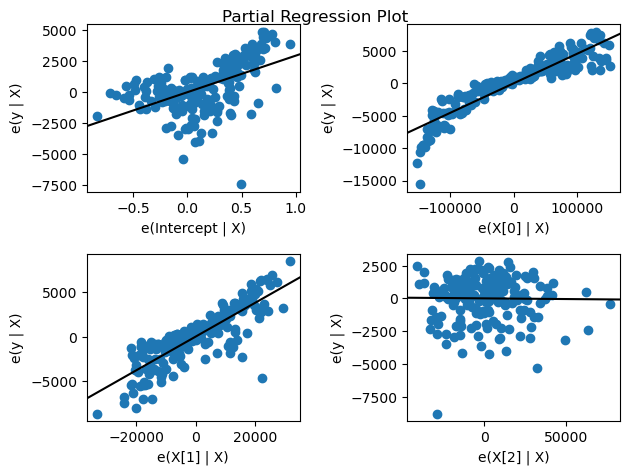

In [104]:
import statsmodels.api as sm
sm.graphics.plot_partregress_grid(model1)
plt.show()

- AV plot

  y-x1 (regression) accepted

  y~x2 Regression accepted

  y~x3 regression not accepted as it is not a regression line(slanted), but a horizontal line

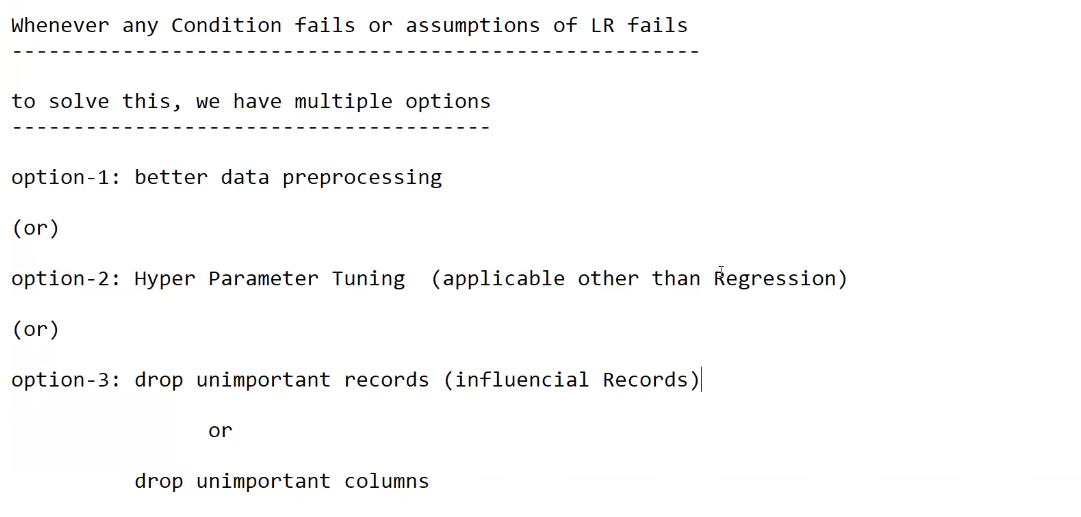

# Let try by dropping the influential records
- 198 records with 3 columns

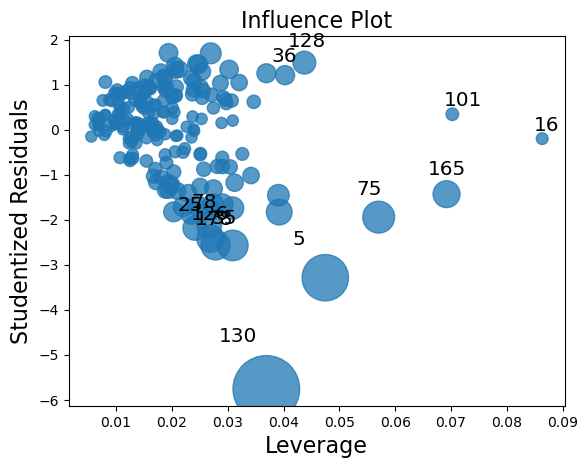

In [106]:
import statsmodels.api as sm

sm.graphics.influence_plot(model1)
plt.show()

In [51]:
df.iloc[130]

TV             700
radio        39600
newspaper     8700
sales         1600
Name: 130, dtype: int64

In [108]:
#drop the influential Records
df.drop(index=[130,5,75,165,101,16,128,36],inplace=True)

X=df.drop(columns=["sales"])
y=df["sales"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=10)

from sklearn. linear_model import LinearRegression
mode12 = LinearRegression()
mode12.fit(X_train,y_train)
print("Intercept:",mode12.intercept_)
print("Coefficients:",mode12.coef_)

ypred_train = mode12.predict(X_train)
print("Train R2:",r2_score(y_train,ypred_train))
print("Cross Validation Score:", cross_val_score(mode12,X_train,y_train,cv=5).mean())

ypred_test = mode12.predict(X_test)
print("Test R2:",r2_score(y_test,ypred_test))

Intercept: 3187.802420142447
Coefficients: [0.04231835 0.19018805 0.01162628]
Train R2: 0.9186337181540609
Cross Validation Score: 0.9039524436092407
Test R2: 0.8901435248440224


In [110]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, train_size=0.8,random_state=10)

import statsmodels. formula.api as smf
mode12=smf.ols("y_train~X_train",data=df_train).fit()
mode12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                y_train   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     560.7
Date:                Sat, 05 Oct 2024   Prob (F-statistic):           6.32e-81
Time:                        15:46:42   Log-Likelihood:                -1330.4
No. Observations:                 153   AIC:                             2669.
Df Residuals:                     149   BIC:                             2681.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3187.8024    305.095     10.449      0.000    2584.932    3790.673
X_train[0]     0.0423      0.001     29.315      0.000       0.039       0.045
X_train[1]     0.1902      0.009     21.513      0.000       0.173       0.208
X_train[2]     0.0116      0.007      1.666      0.098      -0.002       0.025
==============================================================================
Omnibus:                       12.667   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               14.043
Skew:                          -0.742   Prob(JB):                     0.000893
Kurtosis:                       2.985   Cond. No.                     4.50e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.5e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# **Final model including TV and Radio only**

In [126]:
# Remember to load the data again as wwe are dropping the records again

#drop the influential Records
df.drop(index=[130,5,75,165,101,16,128, 36], inplace=True)

#drop newspaper
X=df.drop(columns=["sales","newspaper"])
y=df["sales"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=10)

from sklearn. linear_model import LinearRegression
model3 = LinearRegression()
model3.fit(X_train,y_train)
print("Intercept:",model3.intercept_)
print("Coefficients:",model3.coef_)

ypred_train = model3.predict(X_train)
print("Train R2:",r2_score(y_train,ypred_train))
print("Cross Validation Score:",cross_val_score(model3,X_train,y_train,cv=5).mean())

ypred_test = model3.predict(X_test)
print("Test R2:",r2_score(y_test,ypred_test))

Intercept: 3357.7202283404677
Coefficients: [0.04254012 0.19615138]
Train R2: 0.9171180924161672
Cross Validation Score: 0.9037797241797525
Test R2: 0.8971081979513411


In [128]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, train_size=0.8,random_state=10)

import statsmodels. formula.api as smf
model1=smf.ols("y_train~X_train",data=df_train).fit()
model1. summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                y_train   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     829.9
Date:                Sat, 05 Oct 2024   Prob (F-statistic):           7.66e-82
Time:                        16:19:03   Log-Likelihood:                -1331.8
No. Observations:                 153   AIC:                             2670.
Df Residuals:                     150   BIC:                             2679.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3357.7202    289.238     11.609      0.000    2786.213    3929.227
X_train[0]     0.0425      0.001     29.422      0.000       0.040       0.045
X_train[1]     0.1962      0.008     24.123      0.000       0.180       0.212
==============================================================================
Omnibus:                       13.858   Durbin-Watson:                   2.110
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.419
Skew:                          -0.776   Prob(JB):                     0.000449
Kurtosis:                       3.093   Cond. No.                     4.19e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.19e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""